In [9]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alive_progress import alive_it

DATA_DIR = 'data'
DATA_FILES = ['conditions', 'forms', 'horse_sexes', 'horses', 'markets', 'odds', 'riders', 'runners', 'weathers']

data = {}

for data_file in DATA_FILES:
    data[data_file] = pd.read_csv(f'%s/%s.csv' % (DATA_DIR, data_file))

def for_all_rows(df):
    for i in range(len(df)):
        yield df.iloc[i]

on 195: /tmp/ipykernel_20439/3829951496.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
          if not math.isnan(runner['position']) and not math.isnan(age) and age is not None:
/tmp/ipykernel_20439/3829951496.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
          age = int(age)


|████████████████████████████████████████| 44428 in 13.9s (3185.89/s) 


/tmp/ipykernel_20439/3829951496.py:24: RuntimeWarning: invalid value encountered in divide
  plt.plot(np.array(wins_per_age) / np.array(total_ages))


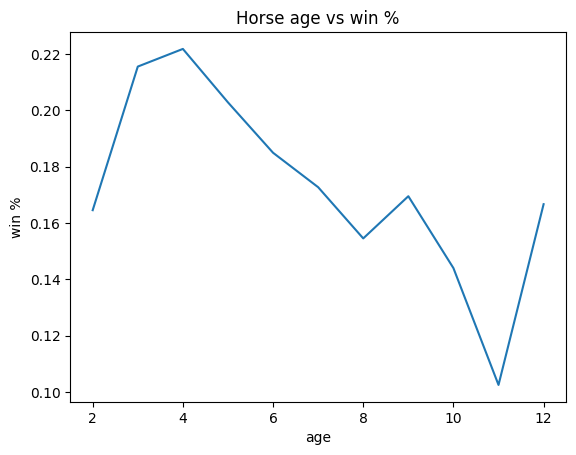

In [10]:
# print(data['runners'].columns)

# error on row 1705
# error on row 1707
# horse age vs place %
wins_per_age = [0] * 20
total_ages = [0] * 20
for runner in alive_it(for_all_rows(data['runners'])):
    try:
        age = data['horses'][data['horses']['id'] == runner['horse_id']]['age']
        if not math.isnan(runner['position']) and not math.isnan(age) and age is not None:
            age = int(age)
            total_ages[age] += 1
            if runner['position'] < 3:
                wins_per_age[age] += 1
    except:
        print(f'error on row %s' % str(runner))

total_placements = sum(wins_per_age)
fig, ax = plt.subplots()
ax.set_title('Horse age vs win %')
ax.set_ylabel('win %')
ax.set_xlabel('age')
plt.plot(np.array(wins_per_age) / np.array(total_ages))

/tmp/ipykernel_20439/554113634.py:20: RuntimeWarning: invalid value encountered in divide
  ax.plot(placed / total)


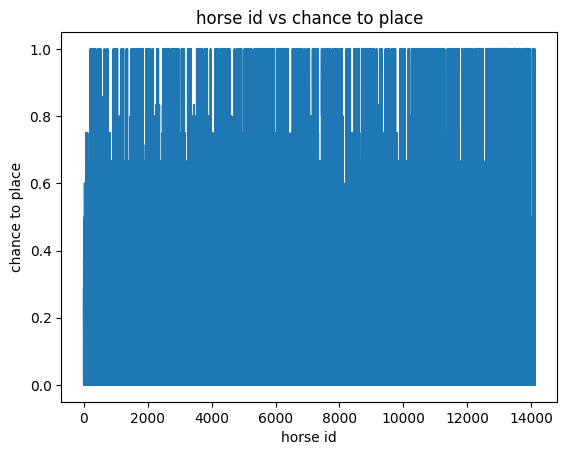

In [21]:
# horse place chance vs position

placed = np.zeros(max(data['runners']['horse_id']) + 1)
total = np.zeros(max(data['runners']['horse_id']) + 1)
for runner in for_all_rows(data['runners']):
    position = runner['position']
    horse_id = runner['horse_id']
    if not math.isnan(horse_id):
        horse_id = int(horse_id)
        total[horse_id] += 1
        if not math.isnan(position):
            position = int(position)
            if position <= 3:
                placed[horse_id] += 1

fig, ax = plt.subplots()
ax.set_title('horse id vs chance to place')
ax.set_ylabel('chance to place')
ax.set_xlabel('horse id')
ax.plot(placed / total)